<a href="https://colab.research.google.com/github/shoorik04/Netflix_Data_Analysis-/blob/main/Netflix_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/data files (for analysis)/netflix_titles.csv"


import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(file_path)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


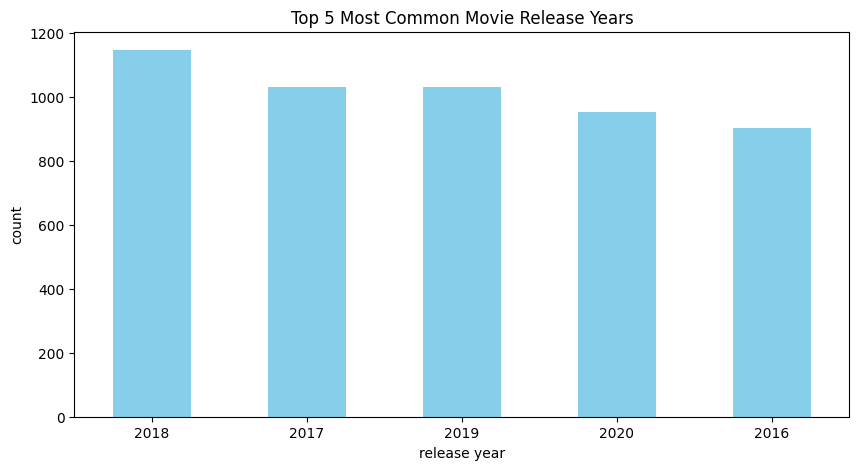

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
groupby_year = df.groupby('release_year').size()
years_raodenoba = df['release_year'].value_counts().sort_values(ascending=False)
years_raodenoba.head()



plt.figure(figsize=(10,5))

years_raodenoba.head(5).plot(kind='bar', color = "skyblue")
plt.xlabel("release year")
plt.ylabel("count")
plt.title("Top 5 Most Common Movie Release Years")
plt.xticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['duration'] = df['duration'].astype(str).fillna('Unknown')

movie_durations = df[df['duration'].str.contains("min")].copy()

movie_durations['duration'] = movie_durations['duration'].str.replace(" min", "").astype(int)

print(movie_durations[['title', 'duration']].head())

                               title  duration
0               Dick Johnson Is Dead        90
6   My Little Pony: A New Generation        91
7                            Sankofa       125
9                       The Starling       104
12                      Je Suis Karl       127


In [ ]:
average_duration = movie_durations['duration'].mean()
print(f"📌 The average movie duration is {average_duration:.2f} minutes.")

📌 The average movie duration is 99.58 minutes.


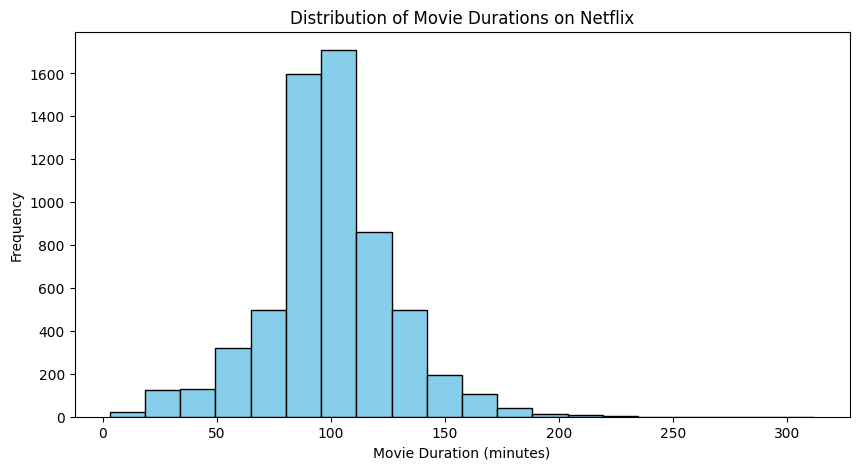

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(movie_durations['duration'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Movie Duration (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Durations on Netflix")
plt.show()


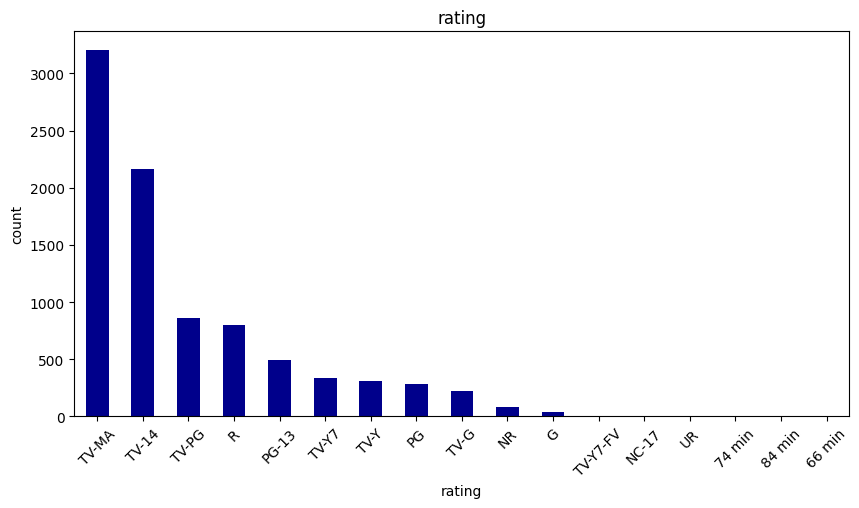

In [ ]:
rating = df['rating'].value_counts().sort_values(ascending=False)
# print(rating)
plt.figure(figsize=(10,5))
rating.plot(kind='bar', color= "darkblue")
plt.xlabel("rating")
plt.ylabel("count")
plt.title("rating")
plt.xticks(rotation=45)
plt.show()

0       2021.0
1       2021.0
2       2021.0
3       2021.0
4       2021.0
         ...  
8802    2019.0
8803    2019.0
8804    2019.0
8805    2020.0
8806    2019.0
Name: year_added, Length: 8807, dtype: float64


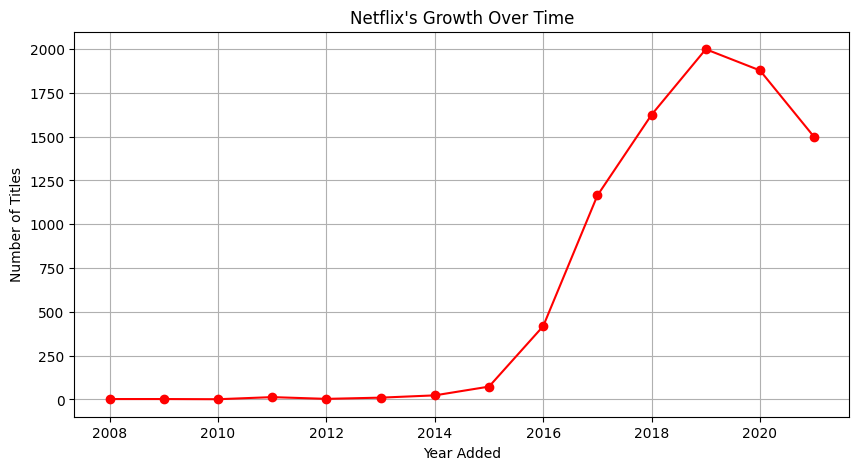

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

df['year_added'] = df['date_added'].dt.year

netflix_growth = df['year_added'].value_counts().sort_index()
print(df['year_added'])
plt.figure(figsize=(10,5))
plt.plot(netflix_growth.index, netflix_growth.values, marker='o', linestyle='-', color='red')
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.title("Netflix's Growth Over Time")
plt.grid(True)
plt.show()

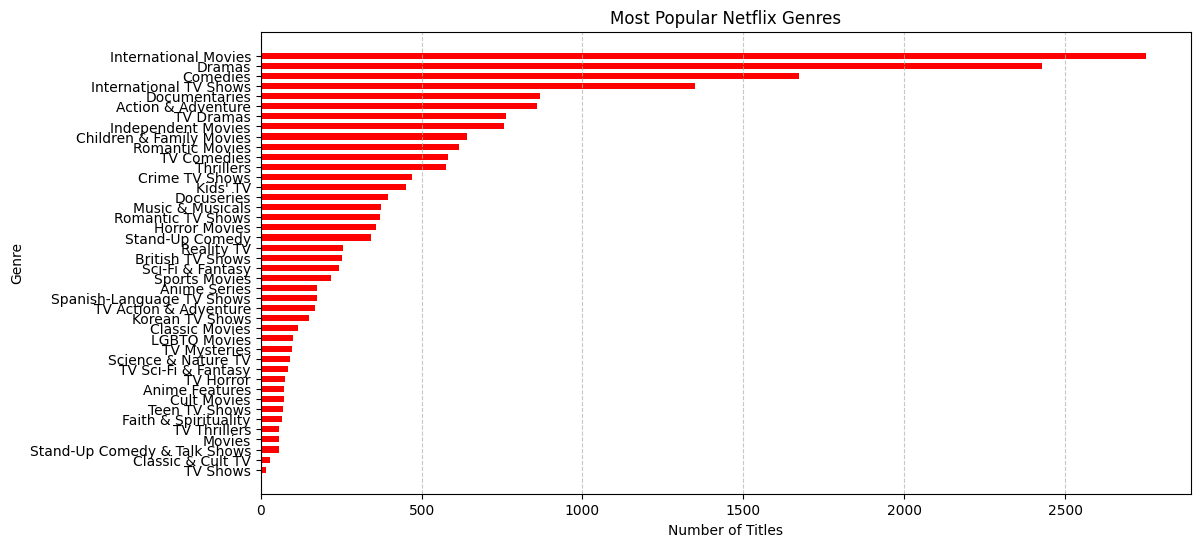

In [ ]:
from collections import Counter

all_genres = df['listed_in'].dropna().str.split(', ')
flat_genre_list = [genre for sublist in all_genres for genre in sublist]  # Flatten list

genre_counts = Counter(flat_genre_list)

genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12,6))
plt.barh(genre_df['Genre'], genre_df['Count'], color='red', height=0.6)
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.title("Most Popular Netflix Genres")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


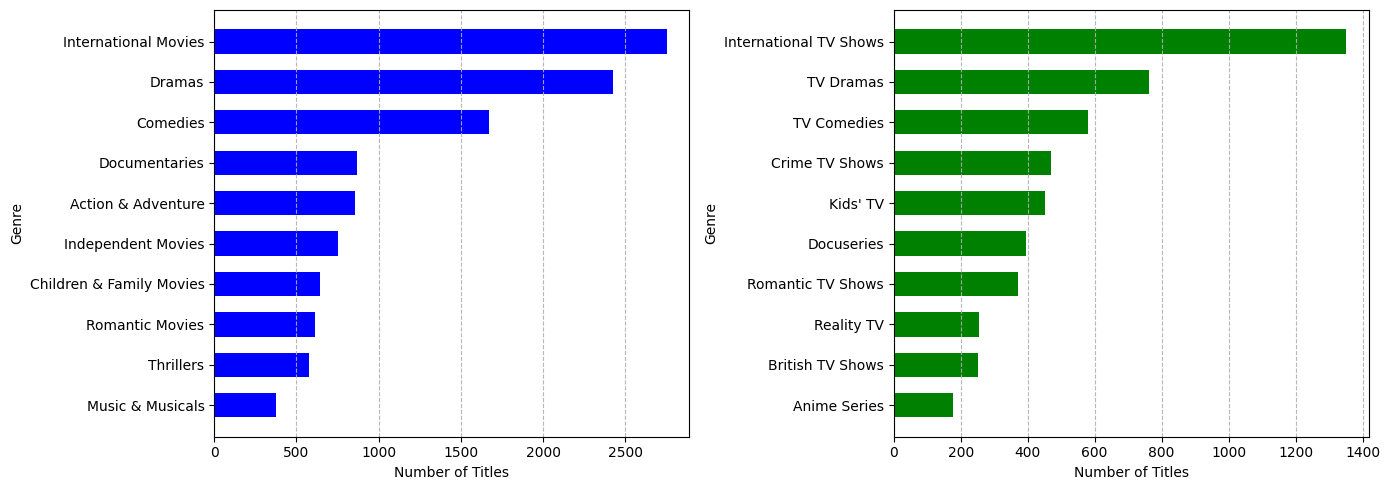

In [ ]:
# we use here counter library aswell

movies_df = df[df['type'] == 'Movie']
tvshows_df =df[df['type'] == "TV Show"]

def count_genres(df):

  all_genres = df['listed_in'].dropna().str.split(', ')
  flat_genre_list = [genre for sublist in all_genres for genre in sublist]

  genre_counts = Counter(flat_genre_list)
  return genre_counts

movies_genre = count_genres(movies_df)
tvshows_genre = count_genres(tvshows_df)

movies_genre_df = pd.DataFrame(movies_genre.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
tvshows_genre_df = pd.DataFrame(tvshows_genre.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].barh(movies_genre_df["Genre"][:10], movies_genre_df["Count"][:10], color='blue', height=0.6)
axes[0].set_xlabel("top 10 movies")
axes[0].invert_yaxis()

axes[1].barh(tvshows_genre_df["Genre"][:10], tvshows_genre_df["Count"][:10], color='green', height=0.6)
axes[1].set_xlabel("top 10 tv shows")
axes[1].invert_yaxis()

for ax in axes:
  ax.set_xlabel("Number of Titles")
  ax.set_ylabel("Genre")
  ax.grid(axis='x', linestyle='--', alpha=0.9)

plt.tight_layout()
plt.show()

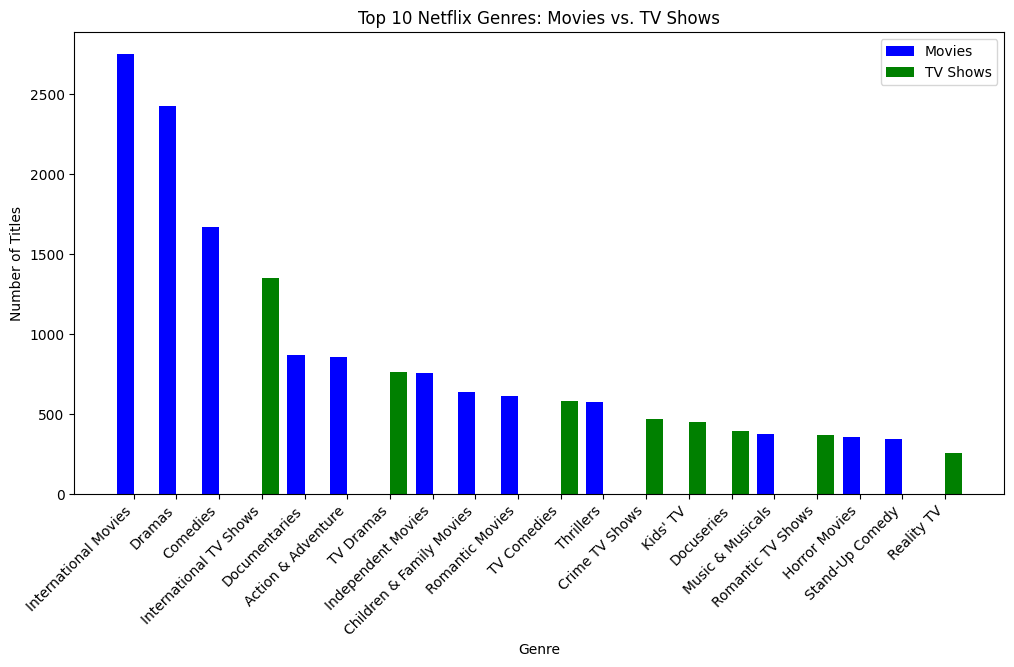

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Separate Movies and TV Shows
movies_df = df[df['type'] == 'Movie']
tvshows_df = df[df['type'] == 'TV Show']

# Function to count genres
def count_genres(df):
    all_genres = df['listed_in'].dropna().str.split(', ')
    flat_genre_list = [genre for sublist in all_genres for genre in sublist]
    return Counter(flat_genre_list)

# Get genre counts for Movies and TV Shows
movie_genres = count_genres(movies_df)
tvshow_genres = count_genres(tvshows_df)

# Convert to DataFrame for visualization
movie_genre_df = pd.DataFrame(movie_genres.items(), columns=['Genre', 'Movie Count'])
tvshow_genre_df = pd.DataFrame(tvshow_genres.items(), columns=['Genre', 'TV Show Count'])

# Merge both DataFrames (Outer Join to keep all genres)
genre_df = pd.merge(movie_genre_df, tvshow_genre_df, on='Genre', how='outer').fillna(0)

# Sort by total count
genre_df['Total'] = genre_df['Movie Count'] + genre_df['TV Show Count']
genre_df = genre_df.sort_values(by='Total', ascending=False)[:20]  # Top 10 genres

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(genre_df))  # X-axis positions
width = 0.4  # Bar width

# Bars for Movies and TV Shows
ax.bar(x - width/2, genre_df['Movie Count'], width, label='Movies', color='blue')
ax.bar(x + width/2, genre_df['TV Show Count'], width, label='TV Shows', color='green')

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(genre_df['Genre'], rotation=45, ha='right')
ax.set_xlabel("Genre")
ax.set_ylabel("Number of Titles")
ax.set_title("Top 10 Netflix Genres: Movies vs. TV Shows")
ax.legend()

plt.show()


In [ ]:
print("...")

...
